<br>
# ** 5 Python for Finance**
파이썬을 활용한 금융분석

### **review Data Datum**
1. Datum(숫자, "문자"), Data([list], {dict}, (tuple,))
1. (기본/외부/사용자) 모듈, 함수, 메소드
1. []의 문자에서 활용( [index], [:slicing]), 함수를 활용{for : 반복, if :판단, enumerate() :순번 integer 출력}
1. 재무제표 Web Crawling ==> type 변경 ==> 시각화
1. ndarray, Series, Dataframe

### **review Series**
1. pd.Series( [ data ] , index = [ index ])
1. series 사칙연산
1. series [ Boolean 판단문 ]
1. series.index = [ list ]
1. series.isnull()
1. series.drop()

### **review DataFrame**
1. pd.DataFrame( { columns :  [ data ] , columns :  [ data ] } )
1. pd.to_datetime()
1. df.rename( columns = { 기존 column , 새로운 column } )
1. df.insert( 컬럼순서,  컬럼명 ,  data )
1. df.column이름 &nbsp; | &nbsp; df['column이름']
1. df [ index Slicing ]
1. df.iloc[ index slicing,  column slicing ]
1. df.reset_index()        :  index  -> column
1. df.set_index( '컬럼명' ) :  column -> index
1. df.sort_index()
1. df.sort_value()
1. df[ boolean 함수 ]
1. df[ boolean 함수 ].column이름
1. axis = 0 : index | axis = 1 : column
1. df.drop( 'index이름'  , axis = 0 )
1. df.drop( 'column이름' ,  axis = 1 )
1. df.index.tolist()
1. df.column.tolist()
1. df.apply(lambda x: x ** 2)  
1. pd.pivot_table(df,index = [], values = [], aggfunc = [], margins = True)

### **review DataFrame static**
1. .count()
1. .describe()
1. .min()     .max()
1. .idxmin()  .idxmax()
1. .quantile()   
1. .sum()
1. .mean()    .median()
1. .var() 분산 .std() 정규분산
1. .cumsum()  .cumprod()  누적 합    누적 곱
1. .cummin()  .cummax()   누적최소값, 누적최대값

### **review Series & DataFrame 결측치 제어하기**
1. df.dropna()
1. df.fillna(method='ffill',  limit=2)  # 결측치 대체
1. df.fillna(df.mean()['컬럼명'])   
1. Series.interpolate(method='time')    # 결측치 보간 (시계열적 특성을 부여가능)
1. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

### **review &nbsp; TimeSeries**
1. from datetime import datetime
1. pandas.date_range(end = '2017-07-01', periods=30, freq='BM')  
1. pandas.date_range('2017/8/8 09:09:09', periods=5, normalize=True)
1. [str(date.date()) &nbsp;&nbsp; for &nbsp;&nbsp; date &nbsp;&nbsp; in &nbsp;&nbsp; pd.date_range('2017/01/01', '2017/01/11')]

<br><br>
## <strong>1 금융 시계열 데이터 결측치 처리 / 보간법
pandas를 활용한 데이터 정렬 및 보간법
1. DataFrame.fillna()
2. Series.interpolate(method='values', limit=1, limit_direction='backward') # 'forward','backward','both'

In [1]:
from googlefinance.get import get_data

codes  = ['KRX:005930', 'NYSE:GM', 'NYSE:KO', 'KRX:000660']
prices = get_data(codes, '7Y', output='close')
prices.head(3)

,KRX:005930,NYSE:GM,NYSE:KO,KRX:000660
date,,,,
2011-04-19,875000.0,29.97,33.655,32800.0
2011-04-20,916000.0,29.59,33.545,34300.0
2011-04-21,928000.0,29.93,33.920,37000.0


In [2]:
# 빠진 내용이 너무 많음에도 비교 데이터로 보간을 필요시
# 고육지책
print(prices.isnull().sum())
# Series.interpolate()

KRX:005930    431
NYSE:GM       396
NYSE:KO       396
KRX:000660    431
dtype: int64


In [3]:
prices = prices.fillna(method='ffill')     # 중간에 Nan이 존재시, 직전의 가격을 덧붙인다
prices = prices.dropna()                   # 이후에도 빈 부분이 있으면(맨앞/ 맨뒤) 전체적 연산을 위해 제거한다
prices.head(3)

,KRX:005930,NYSE:GM,NYSE:KO,KRX:000660
date,,,,
2011-04-19,875000.0,29.97,33.655,32800.0
2011-04-20,916000.0,29.59,33.545,34300.0
2011-04-21,928000.0,29.93,33.920,37000.0


<br><br>
## **2 금융 시계열 데이터 전처리**
데이터 분석을 위한 전처리 방법

<br>
### **01 가격 차이가 큰 시계열 데이터 비교하기**
데이터 불러오기

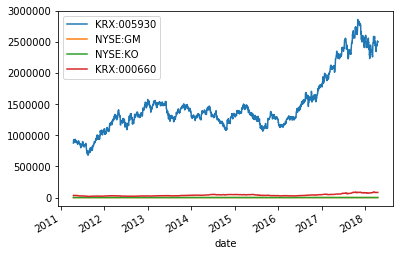

In [4]:
%matplotlib inline
prices.plot()

In [5]:
price = prices['KRX:005930']
price[-5:]

date
2018-04-13    2490000.0
2018-04-14    2490000.0
2018-04-16    2517000.0
2018-04-17    2499000.0
2018-04-18    2499000.0
Name: KRX:005930, dtype: float64

In [6]:
# 주가변화율 계산 (2013-08-03 ~ 2013-10-03)
# 1 : 단위 투자비용 (ex) 주가 매입비용 )
price["2013-10-03"] / price["2013-08-03"] -1

0.10264385692068423

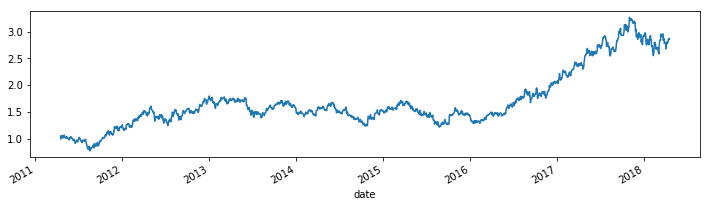

In [7]:
# .pct_change() : 퍼센트 변화율을 계산
# .cumprod()    : 일별 퍼센트 변화의 "누적 곱" 계산
returns      = price.pct_change()
ret_price    = (1 + returns).cumprod() # 1 + : 초기 1에서 부터 확률곱을 누적
ret_price[0] = 1

%matplotlib inline
ret_price.plot(figsize=(12,3))

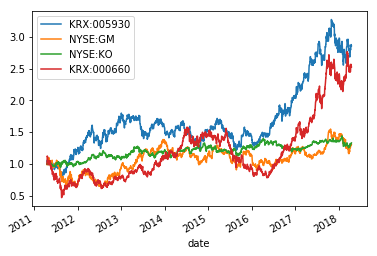

In [8]:
for col in prices.columns:
    pct_returns = prices[col].pct_change()
    pct_returns = (1 + pct_returns).cumprod() # 1 + : 초기 1에서 부터 확률곱을 누적
    pct_returns[0] = 1
    pct_returns.plot(legend=True)

<br>
### **02 누적 수익률 계산 **
.pct_change().cumprod()

In [9]:
# 특정기간의 누적 수익을 계산한다
# 일간 데이터 -> 월갈 데이터로 줄인뒤 가격 변동률을 추출한다
# 2012년도 1년 데이터만 추출
month_returns = price.resample('BM').last().pct_change()
month_returns['2012']

date
2012-01-31    0.046314
2012-02-29    0.089431
2012-03-30    0.057214
2012-04-30    0.090196
2012-05-31   -0.128777
2012-06-29   -0.008258
2012-07-31    0.089925
2012-08-31   -0.058060
2012-09-28    0.091646
2012-10-31   -0.026746
2012-11-30    0.073282
2012-12-31    0.082504
Freq: BM, Name: KRX:005930, dtype: float64

In [10]:
# 특정기간의 뭘별 백분율 누적곱 변화를 계산한다
# 월초에 원금을 투입한 경우, 원금의 변화율
m_ret = (1 + month_returns).cumprod()
m_ret['2012']

date
2012-01-31    1.239642
2012-02-29    1.350504
2012-03-30    1.427772
2012-04-30    1.556551
2012-05-31    1.356103
2012-06-29    1.344905
2012-07-31    1.465845
2012-08-31    1.380739
2012-09-28    1.507279
2012-10-31    1.466965
2012-11-30    1.574468
2012-12-31    1.704367
Freq: BM, Name: KRX:005930, dtype: float64

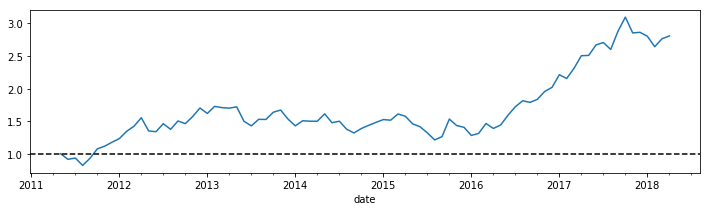

In [11]:
import matplotlib.pyplot as plt
m_ret.plot(figsize=(12,3))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

<br>
### **03 중간 배당데이터 추가하기**
재귀적 연산

In [12]:
# 배당일에 배당 비율을 추가하는 경우
month_returns['2012-03-30'] += 0.003

In [13]:
# cf) 재귀적 연산 +=, -= : 자기 자신을 연산한 결과값을 자신에게 저장
# (무슨 말이 이리도 꼬였니..)
for i in range(4):
    i += 10000
    print(i)

10000
10001
10002
10003


<br><br>
## **3 금융데이터  분석**
pandas를 활용한 금융데이터 분석

<br>
### **01 Introduction**

In [14]:
prices.head(3)

,KRX:005930,NYSE:GM,NYSE:KO,KRX:000660
date,,,,
2011-04-19,875000.0,29.97,33.655,32800.0
2011-04-20,916000.0,29.59,33.545,34300.0
2011-04-21,928000.0,29.93,33.920,37000.0


In [15]:
prices.describe()

,KRX:005930,NYSE:GM,NYSE:KO,KRX:000660
count,2.157000e+03,2157.000000,2157.000000,2157.000000
mean,1.483614e+06,32.117005,40.526038,39610.454335
std,4.655750e+05,5.750908,3.613416,16445.936781
min,6.800000e+05,18.800000,31.980000,15600.000000
25%,1.234000e+06,28.850000,38.220000,27650.000000
50%,1.342000e+06,33.090000,40.910000,34800.000000
75%,1.535000e+06,35.980000,43.010000,47000.000000
max,2.861000e+06,46.480000,48.530000,90700.000000


In [16]:
prices.describe().loc[ ['mean', 'std'] ,:]

,KRX:005930,NYSE:GM,NYSE:KO,KRX:000660
mean,1.483614e+06,32.117005,40.526038,39610.454335
std,4.655750e+05,5.750908,3.613416,16445.936781


In [17]:
# index 중 일부분만 출력
prices.agg(['mean', 'std'])

,KRX:005930,NYSE:GM,NYSE:KO,KRX:000660
mean,1.483614e+06,32.117005,40.526038,39610.454335
std,4.655750e+05,5.750908,3.613416,16445.936781


<br>
### **02 주가간의 상관계수 분석**
.corr

In [18]:
prices_corr = prices.pct_change().dropna().corr()
prices_corr

,KRX:005930,NYSE:GM,NYSE:KO,KRX:000660
KRX:005930,1.000000,0.162545,0.135693,0.410223
NYSE:GM,0.162545,1.000000,0.337637,0.081110
NYSE:KO,0.135693,0.337637,1.000000,0.036892
KRX:000660,0.410223,0.081110,0.036892,1.000000


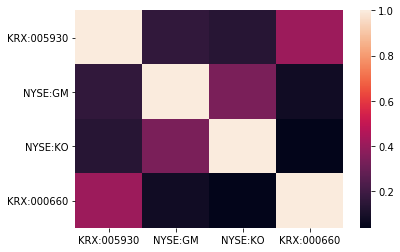

In [19]:
%matplotlib inline
import seaborn as sns
sns.heatmap(prices_corr)

<br>
### **03 Value At Risk**
**일일 손실확률**과 **표준편차**를 사용하여, 해당 종목의 오차범위내 최대 손실가능 금액을 계산한다 [code link](https://www.quantstart.com/articles/Value-at-Risk-VaR-for-Algorithmic-Trading-Risk-Management-Part-I)

    Variance-Covariance calculation of daily Value-at-Risk
    using confidence level c, with mean of returns mu
    and standard deviation of returns sigma, on a portfolio
    of value P.

In [20]:
def var_cov_var(P, c, prices):
    import numpy as np
    import pandas as pd
    from scipy.stats import norm
    
    result = []
    codes = prices.columns
    for code in codes:
        price  = prices[code].pct_change()
        mu     = np.mean(price)
        sigma  = np.std(price)
        alpha  = norm.ppf( 1-c , mu , sigma )
        var    = P - P * ( alpha + 1 )
        result.append([code, round(var, 2), round(var/P * 100, 2)])

    df         = pd.DataFrame(result)
    df.columns = ['Code' , '신뢰구간 최대손실금액 (Value at Risk)', '리스크 비율']
    df         = df.sort_values('리스크 비율', ascending=True)
    return df

P    = 1e6                     # 1,000,000 원 (초기자금)
c    = 0.99                    # 99% 신뢰구간 (confidence interval)
df = var_cov_var(P,c,prices)
df

,Code,신뢰구간 최대손실금액 (Value at Risk),리스크 비율
2,NYSE:KO,19030.35,1.90
0,KRX:005930,35575.93,3.56
1,NYSE:GM,37366.72,3.74
3,KRX:000660,49137.06,4.91


<br><br>
## **4 이동평균선을 활용한 매매 분석**
Golden Cross / Death Cross

<br>
### **01 이동평균 데이터 생성하기**
이동평균 및 차분(.diff()) 데이터 생성하기

In [21]:
prices.tail(3)

,KRX:005930,NYSE:GM,NYSE:KO,KRX:000660
date,,,,
2018-04-16,2517000.0,38.73,44.51,84000.0
2018-04-17,2499000.0,39.17,44.68,82800.0
2018-04-18,2499000.0,39.22,44.88,82800.0


In [22]:
import pandas as pd
price_df = prices['KRX:000660']     # Series 객체
price_df = pd.DataFrame(price_df)   # DataFrame으로 변환한다
price_df.columns = ['Close']
price_df.head(3)

,Close
date,
2011-04-19,32800.0
2011-04-20,34300.0
2011-04-21,37000.0


,Close,15d,40d,15d-40d
date,,,,
2018-04-16,84000.0,81813.33,83307.5,-1494.17
2018-04-17,82800.0,81980.00,83457.5,-1477.50
2018-04-18,82800.0,82080.00,83607.5,-1527.50


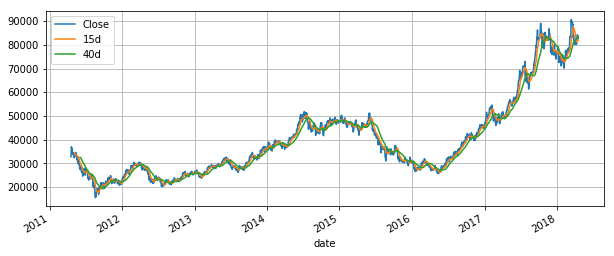

In [23]:
# 15일 이동평균선과 14일 이동평균선
# 그리고 이동평균선간의 '차분'데이터 생성
import numpy as np
price_df['15d'] = np.round(price_df['Close'].rolling(window=15).mean(),2)
price_df['40d'] = np.round(price_df['Close'].rolling(window=40).mean(),2)
price_df['15d-40d'] = price_df['15d'] - price_df['40d']
price_df[['Close','15d','40d']].plot(grid = True, figsize = (10, 4))
price_df.tail(3)

<br>
### **02 매매 시점 데이터 생성하기**
이동평균 및 차분(.diff()) 데이터 생성하기
1. np.where(조건문, True일때 입력데이터, False 일때 입력할 데이터)

In [24]:
# 이동평균 교점에 따른 시간에 따른 신호데이터 생성
# 매매구간 신호의 임계값을 10으로 가정
X = 10     
price_df['Stance'] = np.where(price_df['15d-40d']>X,  1, 0)                # True :  1 \ False : 0
price_df['Stance'] = np.where(price_df['15d-40d']<X, -1, price_df['Stance'])   # True : -1 \ False : Original Data

#  1 : 주식 매매기간 
# -1 : 공매도 매매기간
price_df['Stance'].value_counts()                             

 1    1226
-1     892
 0      39
Name: Stance, dtype: int64

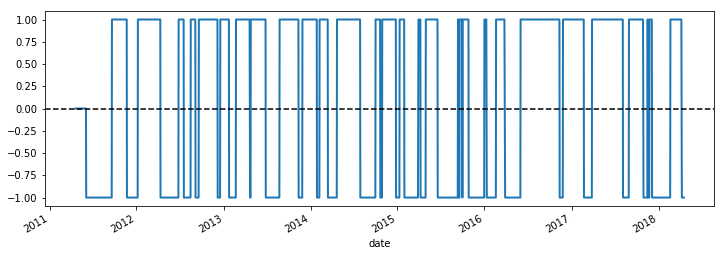

In [25]:
price_df['Stance'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

<br>
### **03 SMAC_Strategy (이동평균선 전략)으로 인한 수익률  데이터 생성**
1. 데이터 변화를 Pct_change 가 아닌 Log 로 변환
1. .cumsum() : Log 결과값을 더하면 누적 수익률로 예측이 가능
1. np.exp() : $ y = e^x$ 자연상수 지수함수로 변환 &nbsp;&nbsp; | &nbsp; [출처](http://rfriend.tistory.com/295)

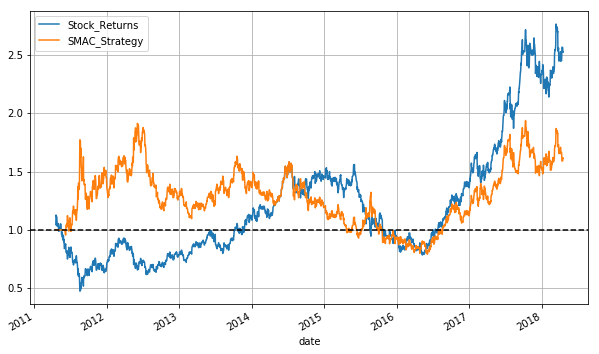

In [26]:
# 매매 수익률 계산
price_df['Stock_Returns'] = np.log(price_df['Close'] / price_df['Close'].shift(1))    # 일간 log() 변환데이터 생성
price_df['SMAC_Strategy'] = price_df['Stock_Returns'] * price_df['Stance'].shift(1)   # 매매 데이터를 1일 지연시키고, 시장 수익률을 곱한다
price_df[['Stock_Returns','SMAC_Strategy']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

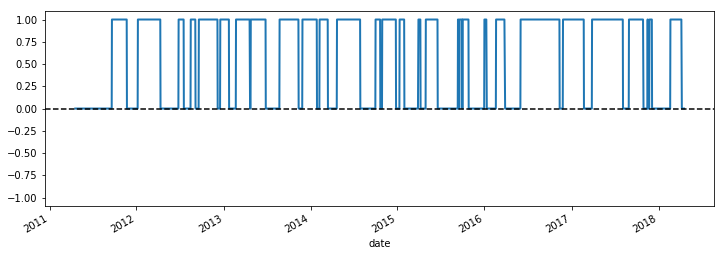

In [27]:
# 공매도가 불가능한 경우
price_df['Stance2'] = np.where(price_df['15d-40d']>X,  1, 0)                # True :  1 \ False : 0
price_df['Stance2'].plot(lw = 2, ylim = [-1.1, 1.1], figsize=(12,4))
plt.axhline(y = 0, linestyle = '--', color = 'k')

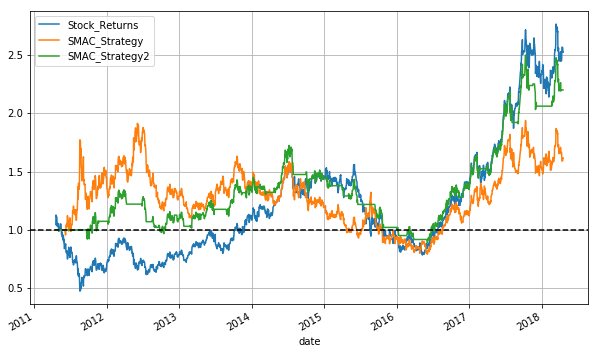

In [28]:
# 일간 log() 변환데이터 생성
# 매매 데이터를 1일 지연시키고, 시장 수익률을 곱한다
price_df['Stock_Returns']  = np.log(price_df['Close']  / price_df['Close'].shift(1))    
price_df['SMAC_Strategy2'] = price_df['Stock_Returns'] * price_df['Stance2'].shift(1)   
price_df[['Stock_Returns','SMAC_Strategy','SMAC_Strategy2']].cumsum().apply(np.exp).plot(grid = True, figsize = (10,6))
plt.axhline(y = 1, linestyle = '--', color = 'k')
plt.show()

<br>
## ** 5 몬테카를로 시뮬레이션**
1. 랜덤한 숫자묶음을 대입하여, **결정론적 모델**을 반복적으로 평가한다
1. 결과들을 분석하여 **가장 가능성이 높은 하나**를 출력한다
1. 모델이 복잡하고, **선형적이지 않으며**, 불확실한 파라미터 쌍을 1개 이상 포함하는 모델의 평가시 사용

<br>
### **01 난수를 활용한 최적의 결과값 측정**
30명 중에 생일이 같은 사람들이 존재할 확률의 계산

In [29]:
# 전체 365개의 list 인덱스 데이터를 생성한 뒤
# 난수로 인덱스에 1을 1번씩 찍을 때, 2번 찍힌 점을 찾는다
import numpy as np
Trials    = 10000
student   = 30
SameBirth = 0                  # 생일이 같은 학생수 Counting 초기화

for trial in range(Trials):
    year = [0] * 365           # [0,0,0,...] : 0 을 365 개 갖는 list                  
    
    for i in range(student):
        new_Day        = np.random.randint(365)  
        year[new_Day] += 1     # 해당 index 에 1 을 입력
        have_SameBday  = False # 값 초기화

    for num in year:           # 전체 365개의 난수를 돌면서 
        if num > 1:            # 30번 찍었을 때 2번 같은 위치 입력 : 2를 찾는다
            have_SameBday = True

    if have_SameBday == True:
        SameBirth += 1
    prob = float(SameBirth) / float(Trials)
        
    if trial % 999 == 0:
        print("{:4}\'th test {} 명중 2명의 생일이 같을확률 : {}".format(trial, student, prob))

   0'th test 30 명중 2명의 생일이 같을확률 : 0.0001
 999'th test 30 명중 2명의 생일이 같을확률 : 0.0705
1998'th test 30 명중 2명의 생일이 같을확률 : 0.1397
2997'th test 30 명중 2명의 생일이 같을확률 : 0.2064
3996'th test 30 명중 2명의 생일이 같을확률 : 0.2798
4995'th test 30 명중 2명의 생일이 같을확률 : 0.3495
5994'th test 30 명중 2명의 생일이 같을확률 : 0.4175
6993'th test 30 명중 2명의 생일이 같을확률 : 0.4867
7992'th test 30 명중 2명의 생일이 같을확률 : 0.5564
8991'th test 30 명중 2명의 생일이 같을확률 : 0.6273
9990'th test 30 명중 2명의 생일이 같을확률 : 0.6976


<br>
### **02 금융상품들의 포트폴리오 평가**
예상 수익률과 변동성 계산

In [30]:
prices.sort_index(inplace=True)
prices.tail(3)

,KRX:005930,NYSE:GM,NYSE:KO,KRX:000660
date,,,,
2018-04-16,2517000.0,38.73,44.51,84000.0
2018-04-17,2499000.0,39.17,44.68,82800.0
2018-04-18,2499000.0,39.22,44.88,82800.0


In [31]:
#  여러 종목의 운동을 비교하여 분산하는 방법
portfolio_rate     = [0.5, 0.2, 0.2, 0.1]
returns            = prices.pct_change()         # 종가를 일간 변동률로 변환한다
cov_returns        = returns.cov()               # 일간 변동률의 공분산
mean_daily_returns = returns.mean()              # 일간 변동률의 평균
weights            = np.asarray(portfolio_rate)  # Portfolio 분산비율을 : 'array'방식으로 변환

# 포트폴리오의 1)연간 예상수익과, 2)변동률 계산
portfolio_return   = round(np.sum(
    mean_daily_returns * weights) * 252, 2)   

portfolio_std_dev  = round(np.sqrt(
    np.dot(weights.T, 
           np.dot(cov_returns, weights)) ) * np.sqrt(252), 2) 

print('{} 분산비율의 포트폴리오의 \n1) 연간 수익은 +-{} 이고 \n2) 변동률은     {} 이다'.format(
    portfolio_rate, portfolio_return, portfolio_std_dev))

[0.5, 0.2, 0.2, 0.1] 분산비율의 포트폴리오의 
1) 연간 수익은 +-0.11 이고 
2) 변동률은     0.17 이다


<br>
### **03 몬테카를로 시뮬레이션을 활용한  포트폴리오 평가**
난수를 활용하여 다양한 포트폴리오를 사프지수 Sharpe Ratio (return / volatility) 로 평가 

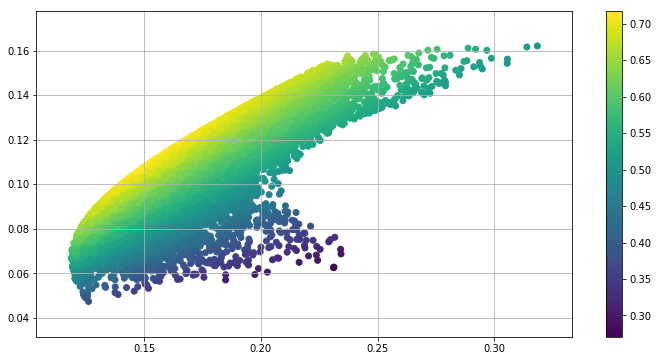

In [32]:
returns            = prices.pct_change()       # 종가를 일간 변동률로 변환한다
cov_returns        = returns.cov()             # 일간 변동률의 공분산
mean_daily_returns = returns.mean()            # 일간 변동률의 평균

# 몬테카를로 시뮬레이션을 활용한 최적의 비율 찾기 
num_portfolios     = 25000                     # 몬테카를로 시뮬레이션 횟수를 정의한다
results            = np.zeros((3 + len(codes), # 시뮬레이션 결과값 저장 Zero Array
                           num_portfolios))
# Portfolio 분산비율
for i in range(num_portfolios):
    weights  = np.random.random(len(codes))    # 난수 혼합비율을 생성
    weights /= np.sum(weights)                 # 난수 전체의 합이 1이 되도록 Rebalance     
    
    portfolio_return  = np.sum(                # 포트폴리오 전체 연간 일평균을 계산 : 확률의 덧셈정리
        mean_daily_returns * weights) * 252       

    portfolio_std_dev = np.sqrt(               # 포트폴리오 전체의 변동률 계산
        np.dot(weights.T, np.dot(cov_returns, weights))) * np.sqrt(252)   

    results[0,i] = portfolio_return            # 0번 인덱스 : 평균
    results[1,i] = portfolio_std_dev           # 1번 인덱스 : 변동률
    results[2,i] = results[0,i]/results[1,i]   # 2번 인덱스 : 사프지수

    for j in range(len(weights)):              # 기업별 생성한 난수비율값 저장
        results[j+3, i] = weights[j]           
    
# 포트폴리오 결과값들을 산점도로 시각화 한다
results_frame = pd.DataFrame(results.T, 
                             columns = ['ret','stdev','sharpe', 
                                        codes[0], codes[1], codes[2], codes[3]])
plt.figure(figsize=(12,6))
plt.scatter(results_frame.stdev,      # X축 
            results_frame.ret,        # Y축
            c = results_frame.sharpe) # cmap = 'RdYlBu'
plt.grid(); plt.colorbar()

<br>
### **04 몬테카를로 포트폴리오 최적값 계산**
1. 샤프지수가 최대인 포트폴리오
1. 표준편차가 최소인 포트폴리오 

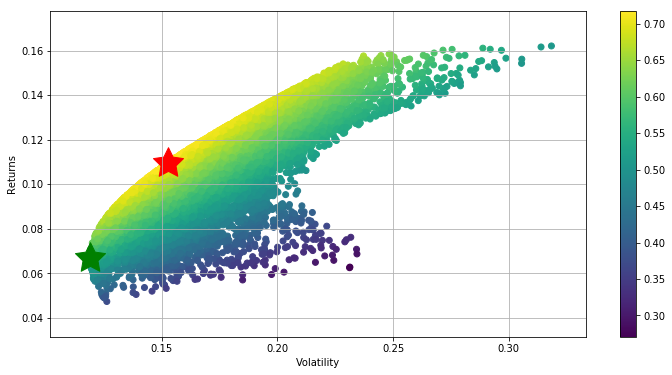

In [33]:
max_sharpe_port = results_frame.iloc[results_frame['sharpe'].idxmax()] # 사프지수 최대값인 인자값을 추출
min_vol_port    = results_frame.iloc[results_frame['stdev'].idxmin()]  # 표준편차가 최소인 인자값을 추출
 
# create scatter plot coloured by Sharpe Ratio
plt.figure(figsize=(12,6)); plt.grid()
plt.scatter(results_frame.stdev, 
            results_frame.ret,
            c = results_frame.sharpe)#,cmap = 'RdYlBu')
plt.xlabel('Volatility'); plt.ylabel('Returns'); plt.colorbar()

# 샤프지수가 최대인 위치에 별을 표시하기 : 빨간색
plt.scatter(max_sharpe_port[1], max_sharpe_port[0],
            marker = (5,1,0), color = 'r', s = 1000)

# 포트폴리오 분산이 최소인 위치에 표시하기 : 녹색
plt.scatter(min_vol_port[1],  min_vol_port[0],
            marker = (5,1,0), color = 'g', s = 1000)

In [34]:
# 사프지수 최대로 갖는 포트폴리오 비율 	
print(max_sharpe_port)

ret           0.109651
stdev         0.152672
sharpe        0.718215
KRX:005930    0.396135
NYSE:GM       0.073451
NYSE:KO       0.353777
KRX:000660    0.176638
Name: 11222, dtype: float64


In [35]:
# 변동성을 최소로 갖는 포트폴리오 비율
print(min_vol_port)

ret           0.066793
stdev         0.118852
sharpe        0.561982
KRX:005930    0.123794
NYSE:GM       0.075128
NYSE:KO       0.727059
KRX:000660    0.074020
Name: 2781, dtype: float64


<br>
## ** 6 다양한 금융 데이터 생성하기**
https://wikidocs.net/3396
Bollinger Bands 

In [36]:
from googlefinance.get import get_data
price_temp = get_data('KRX:005930', '1Y')

<br>
### **01 Stochastic Oscillator** 
[Python Code](https://wikidocs.net/3396) | [개념 바로가기](https://steemkr.com/kr/@phuzion7/stochastic-and-bitcoin)

In [37]:
def fnStoch(df, n=14): # price: 종가(시간 오름차순), n: 기간
    import pandas as pd
    sz = len(df['close'])
    tempSto_K = []
    for i in range(sz):
        if i >= n-1:
            tempUp   = df['close'][i] - min(df['low'][i-n+1:i+1])
            tempDown = max(df['high'][i-n+1:i+1]) -  min(df['low'][i-n+1:i+1])
            tempSto_K.append( tempUp / tempDown )
        else:
            tempSto_K.append(0) #n보다 작은 초기값은 0 설정
    df['Sto_K']     = pd.Series(tempSto_K,  index=df.index)
    df['Sto_D']     = pd.Series(df['Sto_K'].rolling(3).mean())
    df['Sto_SlowD'] = pd.Series(df['Sto_D'].rolling(3).mean())
    return df

In [38]:
price_ = fnStoch(price_temp)
price_.head(3)

,code,open,high,low,close,volume,Sto_K,Sto_D,Sto_SlowD
date,,,,,,,,,
2017-04-19,KRX:005930,2065000.0,2071000.0,2045000.0,2045000.0,202091,0.0,NaN,NaN
2017-04-20,KRX:005930,2029000.0,2040000.0,2004000.0,2014000.0,389092,0.0,NaN,NaN
2017-04-21,KRX:005930,2024000.0,2070000.0,2024000.0,2038000.0,243007,0.0,0.0,NaN


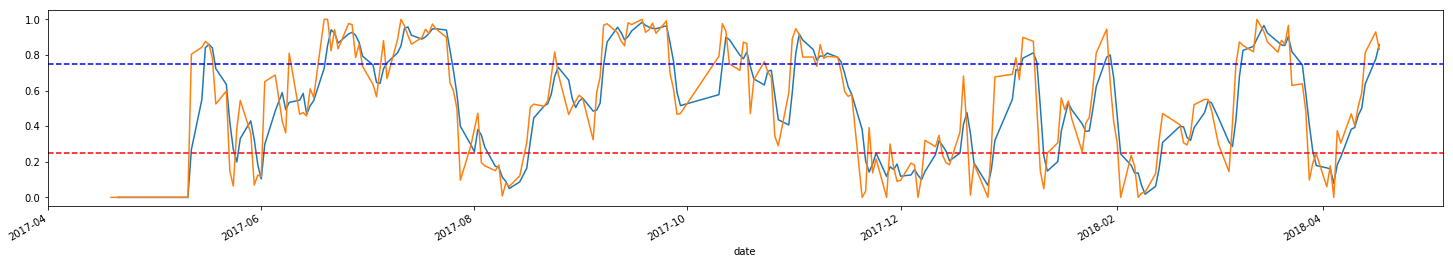

In [39]:
%matplotlib inline
import matplotlib.pyplot as plt
plt.figure(figsize=(25,4))
price_.Sto_D.plot()
price_.Sto_K.plot()
# price_.Sto_SlowD.plot()
plt.axhline(y = 0.25, linestyle = '--', color = 'red')
plt.axhline(y = 0.75, linestyle = '--', color = 'blue')

<br>
### **02 RSI(Relative Strength Index; 상대강도지수)** 
[Python Code](https://wikidocs.net/3399) | [개념 바로가기](https://steemkr.com/kr/@phuzion7/stochastic-and-bitcoin)

In [40]:
# RSI(Relative Strength Index; 상대강도지수)
def fnRSI(m_Df, m_N):
    
    import numpy as np
    import pandas as pd

    U = np.where(m_Df.diff(1) > 0, m_Df.diff(1), 0)
    D = np.where(m_Df.diff(1) < 0, m_Df.diff(1) *(-1), 0)

    AU = pd.DataFrame(U).rolling( window=m_N, min_periods=m_N).mean()
    AD = pd.DataFrame(D).rolling( window=m_N, min_periods=m_N).mean()
    RSI = AU.div(AD+AU) *100
    return RSI

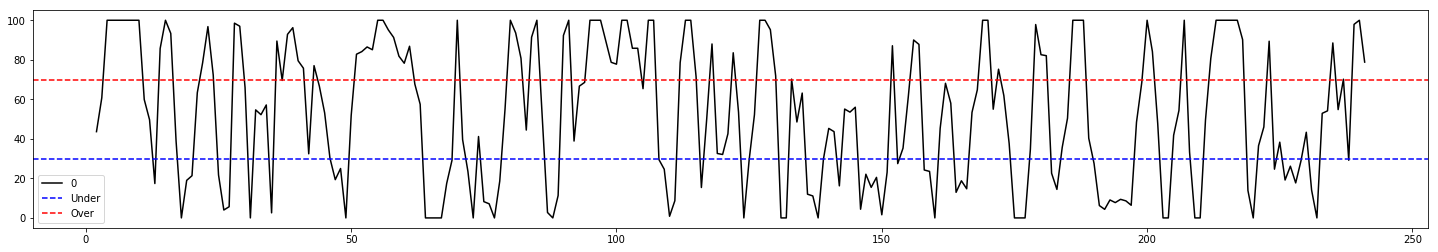

In [47]:
price_RSI = fnRSI(price_temp.close, 3)
price_RSI.plot(figsize=(25,4), label='RSI', color='black')
plt.axhline(y = 30, linestyle = '--', color = 'blue', label = 'Under')  # 과매도 구간
plt.axhline(y = 70, linestyle = '--', color = 'red',  label = 'Over')   # 괘매수 구간
plt.legend()

<br>
### **03 볼린저 밴드 데이터 그리기**
Bollinger Bands 

In [42]:
def fnBolingerBand(m_DF, n=20, k=2):
    m_DF['20d_ma']    = m_DF['Close'].rolling(n).mean()
    m_DF['Bol_upper'] = m_DF['Close'].rolling(n).mean() +  k * m_DF['Close'].rolling(n, min_periods=n).std()
    m_DF['Bol_lower'] = m_DF['Close'].rolling(n).mean() -  k * m_DF['Close'].rolling(n, min_periods=n).std()
    return m_DF

/home/markbaum/Python/django/lib/python3.6/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/home/markbaum/Python/django/lib/python3.6/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/home/markbaum/Python/django/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_inde

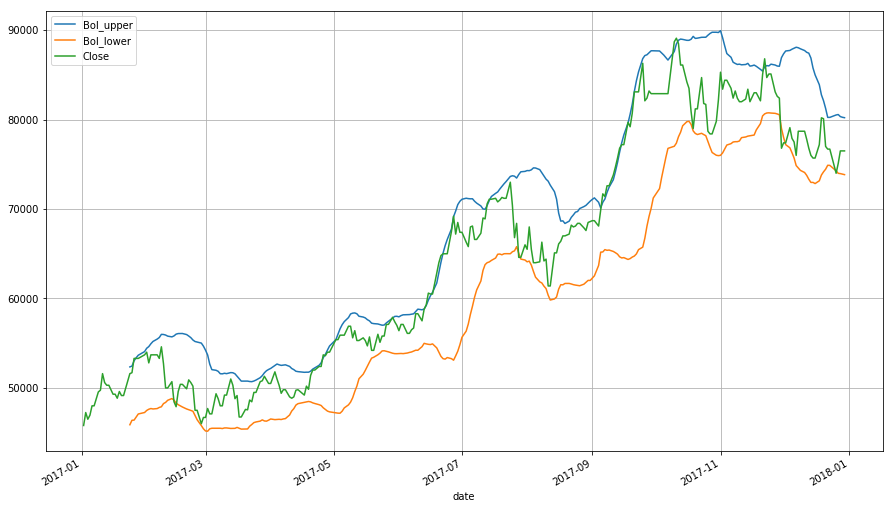

In [43]:
price_2017    = price_df['2017']
price_df_boli = fnBolingerBand(price_2017)
plt.figure(figsize=(15,9))
price_df_boli.Bol_upper.plot()
price_df_boli.Bol_lower.plot()
price_df_boli.Close.plot()
plt.legend(); plt.grid(); plt.show()

<br>
### **04 MACD(moving average convergence/divergence)** 
[Python Code](https://wikidocs.net/3397) | 지수 이평선의 차분 데이터의 시각화로 일반적으로 MACD(12, 26, 9)가 많이 사용됩니다. 

In [44]:
# MACD = EMA(numFast) - EMA(numSlow)
# EMA(Exponential Moving Average ; 지수이동평균)
def fnMACD(m_Df, m_NumFast=12, m_NumSlow=26, m_NumSignal=9):
    m_Df['EMAFast']    = m_Df['close'].rolling( window = m_NumFast, min_periods = m_NumFast - 1).mean()
    m_Df['EMASlow']    = m_Df['close'].rolling( window = m_NumSlow, min_periods = m_NumSlow - 1).mean()
    m_Df['MACD']       = m_Df['EMAFast'] - m_Df['EMASlow']
    m_Df['MACDSignal'] = m_Df['MACD'].ewm( span = m_NumSignal, min_periods = m_NumSignal-1).mean()
    m_Df['MACDDiff']   = m_Df['MACD'] - m_Df['MACDSignal']
    return m_Df

In [45]:
price_fnMACD = fnMACD(price_temp)
price_fnMACD.tail(3)

,code,open,high,low,close,volume,Sto_K,Sto_D,Sto_SlowD,EMAFast,EMASlow,MACD,MACDSignal,MACDDiff
date,,,,,,,,,,,,,,
2018-04-13,KRX:005930,2480000.0,2509000.0,2470000.0,2490000.0,203018,0.813559,0.637219,0.532889,2.436333e+06,2.488000e+06,-51666.666667,-22700.842224,-28965.824442
2018-04-16,KRX:005930,2516000.0,2530000.0,2493000.0,2517000.0,150631,0.929348,0.776826,0.638169,2.441750e+06,2.489154e+06,-47403.846154,-27641.443010,-19762.403144
2018-04-17,KRX:005930,2512000.0,2527000.0,2491000.0,2499000.0,155002,0.831522,0.858143,0.757396,2.444917e+06,2.489615e+06,-44698.717949,-31052.897998,-13645.819951


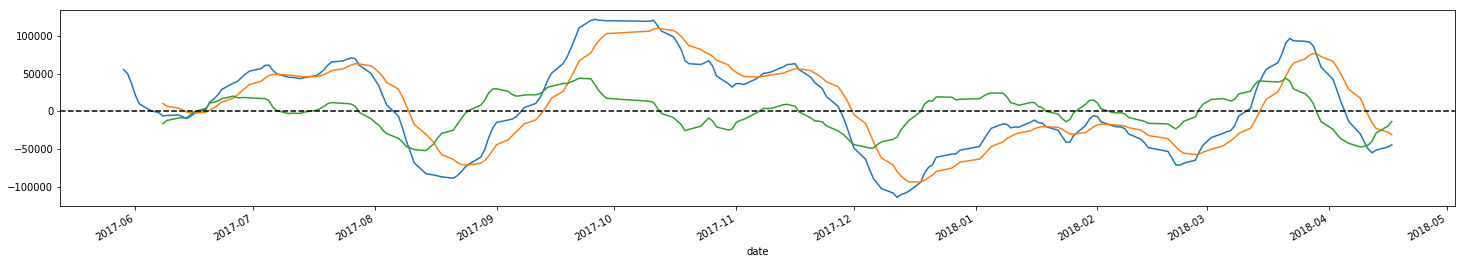

In [48]:
plt.figure(figsize=(25,4))
price_fnMACD.MACD.plot()
price_fnMACD.MACDSignal.plot()
price_fnMACD.MACDDiff.plot()
plt.axhline(y = 0, linestyle = '--', color = 'k')  # 과매도 구간
plt.grid();plt.show()

<br>
# ** 다양한 Back Testing 도구들**
# ** 금융에 대한 자세한 이해가 없으면 이쁘기만 할 뿐 해석 및 파라미터 적용이 어렵다 **

<br>
## ** Back Testing Modules **
참고 데이터 저장용

<br>
## **pip install bt**
[공식문서 Document](http://pmorissette.github.io/bt/) &nbsp;&nbsp; [User Blog](http://quantlabs.net/)

<img src='http://pmorissette.github.io/bt/_static/logo.png' align='left'><br>

다른 분들을 그냥하면 오류가 난다..
나의 GitHub내 개조한 설치버젼을 사용해야 활용이 가능

<br>
### **01 Import data**
기본적인 전략을 분석한다 : 그냥 기울기 알아서 전략을 짜준다니 좋기보단 찜찜해서 별로다

In [2]:
import bt
# 분석을 위한 금융데이터 불러오기 (종가 추출한다)
data = bt.get('TSLA', start='2010-01-01')
data.head(2)

[*********************100%***********************]  1 of 1 downloaded


,tsla
Date,
2010-06-29,23.889999
2010-06-30,23.830000


<br>
### **02 기본적인 전략을 분석**
그냥 기울기 알아서 전략을 짜준다니 좋기보단 찜찜해서 별로다

plan01
0% [############################# ] 100% | ETA: 00:00:00

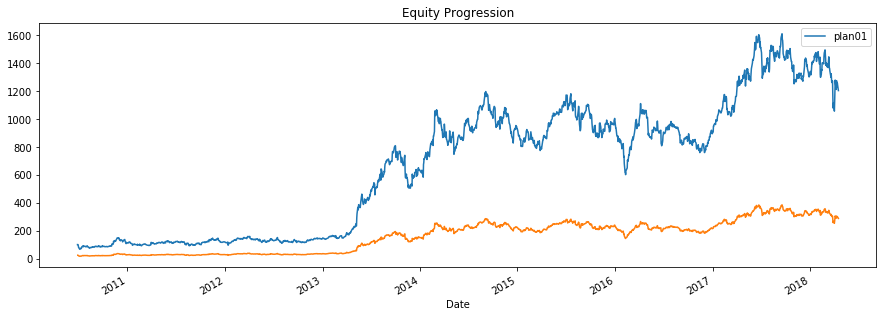

In [10]:
# backtest할 전략을 정의한다
# 여기의 단점이 개별 전략의 파라미터를 외부에서 설정하는게 없이
# 미리 정의한 전략을 가져다 쓰기만 하는 방식이여서 활용도 측면에서 불만족 스러운 단점이 존재
s = bt.Strategy('plan01', [bt.algos.SelectAll(),
                           bt.algos.WeighEqually(),
                           bt.algos.Rebalance()])
# 정의한 전략을 backtest 한다
test = bt.Backtest(s, data)
res = bt.run(test)

# 데이터 시각화 : 너 이름이 뭐지
res.plot()
data.tsla.plot()

<br>
### **03 보고서 작성**

In [11]:
res.display_monthly_returns()

  Year     Jan    Feb     Mar     Apr     May    Jun     Jul     Aug     Sep     Oct     Nov     Dec     YTD
------  ------  -----  ------  ------  ------  -----  ------  ------  ------  ------  ------  ------  ------
  2010    0      0       0       0       0     -0.25  -16.32   -2.31    4.77    7.01   61.77  -24.62   11.47
  2011   -9.5   -0.87   16.16   -0.54    9.2   -3.35   -3.3   -12.18   -1.41   20.42   11.47  -12.77    7.25
  2012    1.79  14.93   11.46  -11.04  -10.96   6.07  -12.37    4.01    2.66   -3.93   20.23    0.15   18.59
  2013   10.75  -7.14    8.79   42.49   81.07   9.82   25.07   25.86   14.42  -17.29  -20.42   18.19  344.14
  2014   20.59  34.95  -14.85   -0.27   -0.06  15.54   -6.98   20.78  -10.02   -0.4     1.17   -9.04   47.85
  2015   -8.46  -0.13   -7.17   19.75   10.95   6.96   -0.79   -6.42   -0.26  -16.69   11.27    4.23    7.91
  2016  -20.34   0.38   19.72    4.78   -7.28  -4.91   10.6    -9.7    -3.76   -3.09   -4.21   12.82  -10.97
  2017   17.9   -0.

<br><br><br>
## ** pip install backtrader**
[GitHub](https://github.com/backtrader/backtrader) | [Document](https://www.backtrader.com/docu/cerebro.html?highlight=plot#backtrader.Cerebro.plot) 상대적 파라미터값을 사용자가 조절 가능해서 좋아보임

<br>
### **01 기본적 전략 분석**
Default 설정값으로 분석한다

In [13]:
from googlefinance.get import get_data
data = get_data('NASDAQ:TSLA', '2Y')
del data['code']
data.head(2)

,open,high,low,close,volume
date,,,,,
2016-04-19,252.23,258.3100,251.660,253.88,4261782
2016-04-20,253.12,254.3699,241.251,247.37,6349403


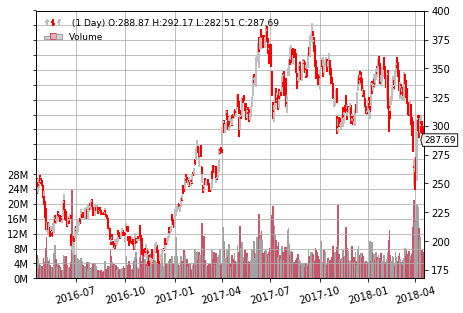

[[<Figure size 432x288 with 2 Axes>]]

In [15]:
import warnings
warnings.filterwarnings("ignore")

import backtrader as bt
import backtrader.feeds as btfeeds

data_bt  = bt.feeds.PandasData(dataname=data)
cerebro  = bt.Cerebro(stdstats=False)      # cerebro entity 생성하기
cerebro.addstrategy(bt.Strategy)           # Add a strategy
cerebro.adddata(data_bt) 
cerebro.run()                              # Run over everything
cerebro.plot(style='bar', iplot=True, width=20, height=15, dpi=300) # Plot the result

<br>
### **02 사용자 Class를 사용한  전략 분석**
10일 30일 이평선을 활용한 백테스팅

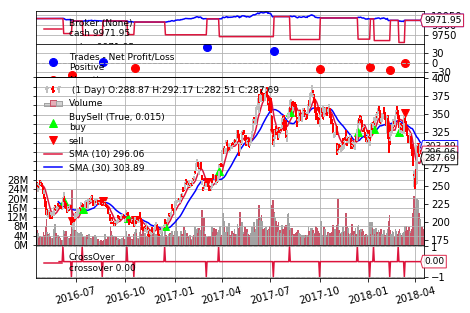

[[<Figure size 432x288 with 5 Axes>]]

In [20]:
class SmaCross(bt.SignalStrategy):
    def __init__(self):
        sma1, sma2 = bt.ind.SMA(period=10), bt.ind.SMA(period=30)
        crossover = bt.ind.CrossOver(sma1, sma2)
        self.signal_add(bt.SIGNAL_LONG, crossover)

cerebro = bt.Cerebro()
cerebro.addstrategy(SmaCross)

# **NOTE**: Read the note about the Yahoo API above. This sample is kept for
# historical reasons. Use any other data feed.
data_bt  = bt.feeds.PandasData(dataname=data)
cerebro.adddata(data_bt)

cerebro.run()
cerebro.plot(iplot=True , width=24, height=15, dpi=300)